In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = pd.read_csv("Zillowhouses.csv")
b = pd.read_csv("Scrapyhouses.csv")

frames = [a, b]
var = pd.concat(frames, ignore_index=True)
var

,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...
...,...,...,...,...,...,...,...,...
562,499000,7024 W TOWNLEY Avenue,Peoria,85345,4.0,3.0,2608.0,https://www.point2homes.com/US/Home-For-Sale/A...
563,345990,2036 E JULIAN Drive,Casa Grande,85122,4.0,2.0,1880.0,https://www.point2homes.com/US/Home-For-Sale/A...
564,355000,7636 E Buena Vista Drive,Prescott Valley,86314,3.0,2.0,1286.0,https://www.point2homes.com/US/Home-For-Sale/A...
565,700000,16610 South 37th Way,Phoenix,85048,5.0,3.0,3250.0,https://www.point2homes.com/US/Home-For-Sale/A...


In [3]:
var.dtypes

Price           int64
address        object
Local_area     object
zipcode        object
beds          float64
baths         float64
sqft          float64
url            object
dtype: object

# Cleaning Data

In [4]:
var['address'].duplicated().any()

True

In [5]:
duplicate = var[var['address'].duplicated()]
duplicate

,Price,address,Local_area,zipcode,beds,baths,sqft,url
354,3000000,14138 E PEAK VIEW Road,Scottsdale,85262,4.0,4.0,6000.0,https://www.point2homes.com/US/Home-For-Sale/A...
507,347000,4640 N Montezuma Ave,Lake Montezuma,86335,2.0,2.0,1613.0,https://www.point2homes.com/US/Home-For-Sale/A...


In [6]:
var.loc[var['address'].str.contains("14138 E PEAK VIEW Road")]

,Price,address,Local_area,zipcode,beds,baths,sqft,url
320,2500000,14138 E PEAK VIEW Road,Scottsdale,85262,4.0,4.0,6000.0,https://www.point2homes.com/US/Home-For-Sale/A...
354,3000000,14138 E PEAK VIEW Road,Scottsdale,85262,4.0,4.0,6000.0,https://www.point2homes.com/US/Home-For-Sale/A...


In [7]:
var.drop([354, 507],axis=0,inplace=True)

In [8]:
var = var.reset_index(drop=True)
var

,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...
...,...,...,...,...,...,...,...,...
560,499000,7024 W TOWNLEY Avenue,Peoria,85345,4.0,3.0,2608.0,https://www.point2homes.com/US/Home-For-Sale/A...
561,345990,2036 E JULIAN Drive,Casa Grande,85122,4.0,2.0,1880.0,https://www.point2homes.com/US/Home-For-Sale/A...
562,355000,7636 E Buena Vista Drive,Prescott Valley,86314,3.0,2.0,1286.0,https://www.point2homes.com/US/Home-For-Sale/A...
563,700000,16610 South 37th Way,Phoenix,85048,5.0,3.0,3250.0,https://www.point2homes.com/US/Home-For-Sale/A...


In [9]:
var['Local_area'] = [x.strip() for x in var['Local_area']] # clean spaces from data

In [10]:
var.iloc[354]

Price                                                    832000
address                                  16437 E NICKLAUS Drive
Local_area                                       Fountain Hills
zipcode                                                   85268
beds                                                        3.0
baths                                                       4.0
sqft                                                     3461.0
url           https://www.point2homes.com/US/Home-For-Sale/A...
Name: 354, dtype: object

## Fix nan values

In [11]:
var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       565 non-null    int64  
 1   address     565 non-null    object 
 2   Local_area  565 non-null    object 
 3   zipcode     565 non-null    object 
 4   beds        563 non-null    float64
 5   baths       563 non-null    float64
 6   sqft        563 non-null    float64
 7   url         565 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 35.4+ KB


In [12]:
# find nan values
var.loc[var.isna().any(axis=1), :]

,Price,address,Local_area,zipcode,beds,baths,sqft,url
398,1000000,The Denovan Difference,Lake Havasu City,86403,NaN,NaN,NaN,https://www.point2homes.com/US/Home-For-Sale/A...
401,1000000,This Is What We Do - Before / After,Lake Havasu City,86403,NaN,NaN,NaN,https://www.point2homes.com/US/Home-For-Sale/A...


In [13]:
var = var.drop(var.index[[398,401]], axis=0)
var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 564
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       563 non-null    int64  
 1   address     563 non-null    object 
 2   Local_area  563 non-null    object 
 3   zipcode     563 non-null    object 
 4   beds        563 non-null    float64
 5   baths       563 non-null    float64
 6   sqft        563 non-null    float64
 7   url         563 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 39.6+ KB


# Analyzing Data

In [14]:
var.describe()

,Price,beds,baths,sqft
count,5.630000e+02,563.000000,563.000000,563.000000
mean,5.455896e+05,3.294849,2.477798,2085.946714
std,7.317538e+05,0.972079,0.861878,936.653497
min,1.775000e+04,1.000000,1.000000,420.000000
25%,3.208775e+05,3.000000,2.000000,1463.000000
50%,4.099000e+05,3.000000,2.000000,1903.000000
75%,5.950000e+05,4.000000,3.000000,2456.500000
max,1.500000e+07,8.000000,8.000000,8625.000000


In [15]:
var.Price.mean()

545589.6145648313

## Region with Most houses?

In [16]:
values = var['Local_area'].value_counts()
values

Phoenix          66
Tucson           33
Mesa             32
Scottsdale       30
Prescott         19
                 ..
Sonoita           1
Rimrock           1
Valencia West     1
Holbrook          1
Patagonia         1
Name: Local_area, Length: 109, dtype: int64

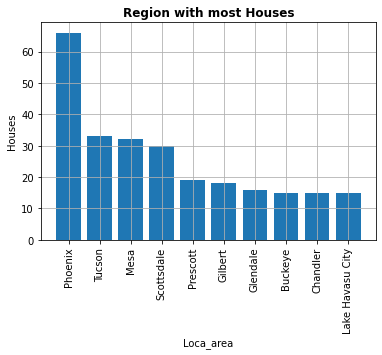

In [17]:
regions = values.keys()[0:10]
y = list(values)[0:10]

pbar = plt.bar(regions, y)
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Loca_area")
plt.ylabel("Houses")
plt.title('Region with most Houses', fontweight = 'bold')
plt.show()

## Most Expensive Region

In [18]:
grouped = var.groupby('Local_area').sum().reset_index()
total = grouped.sort_values('Price', ascending=False)
total

,Local_area,Price,beds,baths,sqft
63,Phoenix,38004632,226.0,168.5,132998.0
79,Scottsdale,36105600,108.0,88.0,88250.0
57,Paradise Valley,17900000,7.0,9.0,9148.0
53,Mesa,15466380,101.0,76.0,62696.0
68,Prescott,14576800,60.0,53.5,51656.0
...,...,...,...,...,...
59,Patagonia,132000,2.0,1.0,1088.0
37,Golden Valley,105000,3.0,2.0,1050.0
58,Parker,95000,1.0,1.0,600.0
9,Bouse,59000,2.0,1.0,720.0


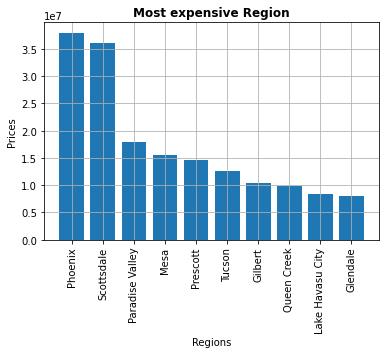

In [19]:
regions = total.Local_area.head(10)
y = total.Price.head(10)

pbar = plt.bar(regions, y)
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Regions")
plt.ylabel("Prices")
plt.title('Most expensive Region', fontweight = 'bold')
plt.show()

## Most common # of bedrooms per house

Text(0.5, 1.0, 'Most common Beds per House')

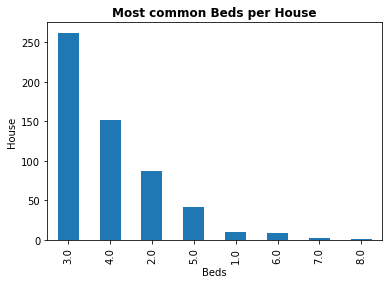

In [20]:
bed_values = var['beds'].value_counts()
bed_values.plot(kind="bar")
plt.xlabel("Beds")
plt.ylabel("House")
plt.title('Most common Beds per House', fontweight = 'bold')

## Prices vs. Sqft, Beds, Baths

Text(0, 0.5, 'Sqft')

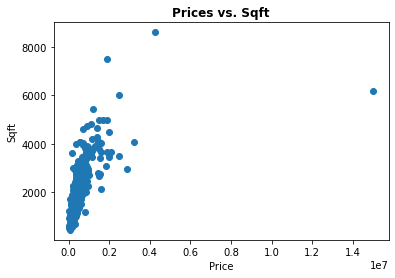

In [21]:
#Prices vs Sqft
plt.scatter(var.Price, var.sqft)
plt.title('Prices vs. Sqft', fontweight = 'bold')
plt.xlabel("Price")
plt.ylabel("Sqft")
# when you read Prices multiply 10^7 to them

In [22]:
max_loc = var.Price.idxmax() #find index of max value
var.iloc[max_loc, :]

Price                                                  15000000
address                                  6121 N Nauni Valley Dr
Local_area                                      Paradise Valley
zipcode                                                   85253
beds                                                        4.0
baths                                                       5.0
sqft                                                     6200.0
url           https://www.zillow.com/homedetails/6121-N-Naun...
Name: 144, dtype: object

Text(0, 0.5, 'Beds')

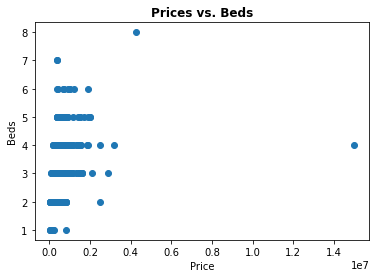

In [23]:
#Price vs Beds
plt.scatter(var.Price, var.beds)
plt.title('Prices vs. Beds', fontweight = 'bold')
plt.xlabel("Price")
plt.ylabel("Beds")

Text(0, 0.5, 'Baths')

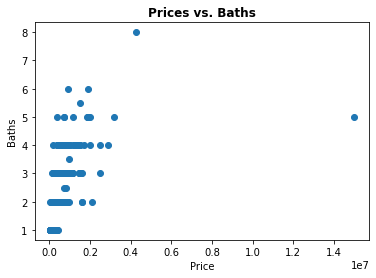

In [24]:
#Price vs Baths
plt.scatter(var.Price, var.baths)
plt.title('Prices vs. Baths', fontweight = 'bold')
plt.xlabel("Price")
plt.ylabel("Baths")

# Machine learning

## Address Outliers

In [25]:
max_loc = var.Price.idxmax()
var.iloc[max_loc, :]

Price                                                  15000000
address                                  6121 N Nauni Valley Dr
Local_area                                      Paradise Valley
zipcode                                                   85253
beds                                                        4.0
baths                                                       5.0
sqft                                                     6200.0
url           https://www.zillow.com/homedetails/6121-N-Naun...
Name: 144, dtype: object

## House Regression line

In [26]:
var2 = var.drop(var.index[144], axis=0)
var2.loc[var2.Price == var2.Price.max(), :]

,Price,address,Local_area,zipcode,beds,baths,sqft,url
453,4250000,10076 E Paradise Drive,Scottsdale,85260,8.0,8.0,8625.0,https://www.point2homes.com/US/Home-For-Sale/A...


## Trainning and Predicting

In [27]:
# Data you want to predict
y = var2.Price

# list of features
features = ['beds', "baths", 'sqft']
X = var2[features]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
melbourne_model = RandomForestRegressor(random_state = 1)
melbourne_model.fit(train_X, train_y)

val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

154355.67611279973
